# NYC Housing Dataset Description


## NYC Housing Dataset Description

The NYC Housing dataset contains information about the New York City Housing and Preservation Department's (HPD) affordable housing development projects. It includes data on building characteristics, affordability levels, location, and ownership information for all properties in the dataset.

### Columns

- `Job #`: A unique identification number assigned to each construction job record.
- `Borough`: The borough in which the construction job is located (Manhattan, Brooklyn, Queens, Bronx, or Staten Island).
- `House #`: The street number of the building where the construction job is located.
- `Street Name`: The name of the street where the construction job is located.
- `Block`: The block number of the building where the construction job is located.
- `Lot`: The lot number of the building where the construction job is located.
- `Bin #`: The Building Identification Number (BIN) assigned by the NYC Department of Buildings.
- `Job Type`: The type of construction job (A1, A2, B, NB, DM, etc.).
- `Community - Board`: The number of the community board responsible for the area where the construction job is located.
- `Curb Cut`: Indicates if a new curb cut is being added as part of the construction job.
- `Fully Permitted`: Indicates if the construction job has been fully permitted by the NYC Department of Buildings.
- `Initial Cost`: The estimated cost of the construction job.
- `Proposed Zoning Sqft`: The proposed square footage of the building after construction.
- `Horizontal Enlrgmt`: The proposed horizontal enlargement of the building after construction.
- `Vertical Enlrgmt`: The proposed vertical enlargement of the building after construction.
- `Enlargement SQ Footage`: The total square footage of the proposed enlargement.
- `Zoning Dist1`: The zoning district of the building where the construction job is located.
- `Job Description`: A brief description of the construction job.

### Dataset Use

The NYC Housing dataset is a valuable resource for researchers, policymakers, and developers interested in affordable housing in New York City. It can be used to analyze trends in affordable housing development, identify neighborhoods with high levels of affordable housing, and evaluate the effectiveness of various affordable housing programs.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apartment-cost-in-new-york-city/apartment_cost_list.csv


# Import necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the dataset
housing_data = pd.read_csv('/kaggle/input/apartment-cost-in-new-york-city/apartment_cost_list.csv')

In [4]:
housing_data.shape

(19613, 18)

In [5]:
housing_data.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [6]:
housing_data.isna().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

In [7]:
housing_data.drop(['Horizontal Enlrgmt','Vertical Enlrgmt','Curb Cut','Zoning Dist1'],axis = 1, inplace = True)

In [8]:
housing_data.isna().sum()

Job #                        0
Borough                      0
House #                      0
Street Name                  0
Block                        0
Lot                          0
Bin #                        0
Job Type                     0
Community - Board            0
Fully Permitted           3988
Initial Cost                 0
Proposed Zoning Sqft         0
Enlargement SQ Footage       0
Job Description              0
dtype: int64

In [9]:
housing_data.dropna(inplace = True)

In [10]:
housing_data.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Job Description
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,07/14/2020,$85000.00,0,0,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,05/23/2007,$60000.00,0,0,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,02/28/2006,$75000.00,0,0,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,09/29/2006,$40000.00,0,0,New C of O for existing building. New duplex a...
5,302000974,BROOKLYN,501,HICKS STREET,321,7501,3003731,A2,306,12/12/2005,$40000.00,0,0,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...


# Descriptive Statistics

In [11]:
# Descriptive Statistics
print(housing_data.describe())

              Job #         Block           Lot         Bin #  \
count  1.562500e+04  15625.000000  15625.000000  1.562500e+04   
mean   1.599860e+08   1526.737984   1249.233472  1.487665e+06   
std    8.999149e+07   1511.712550   2752.822002  9.159169e+05   
min    1.021331e+08      0.000000      0.000000  1.000055e+06   
25%    1.047283e+08    803.000000     17.000000  1.028688e+06   
50%    1.214604e+08   1242.000000     36.000000  1.046917e+06   
75%    1.407101e+08   1556.000000     66.000000  1.083401e+06   
max    5.203838e+08  16188.000000   9007.000000  5.133723e+06   

       Community - Board  Proposed Zoning Sqft  Enlargement SQ Footage  
count       15625.000000          15625.000000            15625.000000  
mean          149.459520            484.046592               12.450880  
std            88.616171           9234.257479              136.476878  
min           101.000000              0.000000                0.000000  
25%           105.000000              0.000000   

Some observations from these statistics are:

The Proposed Zoning Sqft column has a very wide range, with a minimum value of 0 and a maximum value of 724475. The median value is also 0, indicating that most of the development projects do not involve changes to zoning square footage.

The Enlargement SQ Footage column has a small mean and standard deviation, indicating that most of the development projects do not involve significant enlargements.

The Community - Board column has a range from 101 to 503, indicating that development projects are spread across various community boards in New York City.

# Visualization

In [12]:
# Visualization
import plotly.express as px

fig = px.scatter(housing_data, x='Initial Cost', y='Proposed Zoning Sqft')
fig.show()

In [13]:
import plotly.express as px

fig = px.histogram(housing_data, x="Job Type")
fig.show()

In [14]:
import plotly.express as px

fig = px.histogram(housing_data, x="Initial Cost")
fig.show()

In [15]:
# Correlation Analysis
correlation_matrix = housing_data.corr()
print(correlation_matrix)

                           Job #     Block       Lot     Bin #  \
Job #                   1.000000  0.464229 -0.145258  0.989504   
Block                   0.464229  1.000000 -0.120880  0.498129   
Lot                    -0.145258 -0.120880  1.000000 -0.136474   
Bin #                   0.989504  0.498129 -0.136474  1.000000   
Community - Board       0.990840  0.490051 -0.147599  0.997885   
Proposed Zoning Sqft    0.066170  0.043934 -0.006133  0.065357   
Enlargement SQ Footage  0.102311  0.106440 -0.026115  0.116665   

                        Community - Board  Proposed Zoning Sqft  \
Job #                            0.990840              0.066170   
Block                            0.490051              0.043934   
Lot                             -0.147599             -0.006133   
Bin #                            0.997885              0.065357   
Community - Board                1.000000              0.065732   
Proposed Zoning Sqft             0.065732              1.000000   
En

This is a correlation matrix showing the correlation coefficients between pairs of columns in the NYC Housing dataset. The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables.

For example, we can see that the Job # column is positively correlated with the Block, Bin #, and Community - Board columns, with correlation coefficients of 0.46, 0.99, and 0.99, respectively. This indicates that as the values in the Job # column increase, the values in these other columns also tend to increase.

On the other hand, we can see that the Lot column has a weak negative correlation with the other columns, with correlation coefficients ranging from -0.03 to -0.15. This suggests that there is little to no linear relationship between the Lot column and the other columns in the dataset.

# Preparing for Modelling

In [16]:
# Convert Job Type to numerical using label encoding
le = LabelEncoder()
housing_data['Job Type'] = le.fit_transform(housing_data['Job Type'])

In [17]:
# Split data and train model
X = housing_data[['Proposed Zoning Sqft', 'Job Type']]
y = housing_data['Initial Cost'].str.replace('$', '').astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
housing_data['Initial Cost'] = housing_data['Initial Cost'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# All In Machine Learning

In [21]:
# Linear Regression model
lr_params = {}
lr = LinearRegression()
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='neg_mean_squared_error')
lr_grid.fit(X_train_scaled, y_train)
y_pred_lr = lr_grid.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression MSE:', mse_lr)

# Decision Tree Regression model
dt_params = {'max_depth': [3, 5, 7]}
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train_scaled, y_train)
y_pred_dt = dt_grid.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree Regression MSE:', mse_dt)

# Random Forest Regression model
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}
rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)
y_pred_rf = rf_grid.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Regression MSE:', mse_rf)

# SVR model
svr_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'], 'kernel': ['linear', 'rbf']}
svr = SVR()
svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid.fit(X_train_scaled, y_train)
y_pred_svr = svr_grid.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print('SVR MSE:', mse_svr)

# Gradient Boosting Regression model
gbr = GradientBoostingRegressor(max_depth=5, n_estimators=150)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print('Gradient Boosting Regression MSE (scaled data):', mse_gbr)

# XGBoost Regression model
xgb = XGBRegressor(max_depth=5, n_estimators=150)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('XGBoost Regression MSE (scaled data):', mse_xgb)

# Neural Network model
nn = Sequential()
nn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='linear'))
nn.compile(optimizer='adam', loss='mean_squared_error')
nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print('Neural Network Regression MSE (scaled data):', mse_nn)

Linear Regression MSE: 858021587.8201284
Decision Tree Regression MSE: 857765115.4173672
Random Forest Regression MSE: 860262196.1602173
SVR MSE: 861008952.0467438
Gradient Boosting Regression MSE (scaled data): 862254392.4800973
XGBoost Regression MSE (scaled data): 860644309.4196731
98/98 [==============================] - 0s 1ms/step
Neural Network Regression MSE (scaled data): 859978157.9717888


In [22]:
import plotly.graph_objs as go

# Create traces for each model's predicted vs true values
trace_lr = go.Scatter(
    x=y_test,
    y=y_pred_lr,
    mode='markers',
    name='Linear Regression'
)
trace_dt = go.Scatter(
    x=y_test,
    y=y_pred_dt,
    mode='markers',
    name='Decision Tree Regression'
)
trace_rf = go.Scatter(
    x=y_test,
    y=y_pred_rf,
    mode='markers',
    name='Random Forest Regression'
)
trace_svr = go.Scatter(
    x=y_test,
    y=y_pred_svr,
    mode='markers',
    name='SVR'
)
trace_gbr = go.Scatter(
    x=y_test,
    y=y_pred_gbr,
    mode='markers',
    name='Gradient Boosting Regression'
)
trace_xgb = go.Scatter(
    x=y_test,
    y=y_pred_xgb,
    mode='markers',
    name='XGBoost Regression'
)
trace_nn = go.Scatter(
    x=y_test,
    y=y_pred_nn.flatten(),
    mode='markers',
    name='Neural Network Regression'
)
trace_true = go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='True Values'
)

# Create layout for the plot
layout = go.Layout(
    title='Predicted vs True Values',
    xaxis=dict(title='True Values'),
    yaxis=dict(title='Predicted Values')
)

# Create figure and add traces to it
fig = go.Figure(data=[trace_lr, trace_dt, trace_rf, trace_svr, trace_gbr, trace_xgb, trace_nn, trace_true], layout=layout)

# Show the figure
fig.show()


# All in Deep-Learning 

In [23]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print('Test accuracy:', test_acc)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 10s 5ms/step - loss: 0.7099 - accuracy: 0.7434 - val_loss: 0.4335 - val_accuracy: 0.8416
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4461 - accuracy: 0.8431 - val_loss: 0.3553 - val_accuracy: 0.8708
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3762 - accuracy: 0.8686 - val_loss: 0.3206 - val_accuracy: 0.8845
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3407 - accuracy: 0.8806 - val_loss: 0.2962 - val_accuracy: 0.8938
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3082 - accuracy: 0.8908 - val_loss: 0.2805 - val_accuracy: 0.8980
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2870 - accuracy: 0.8989 - val_loss: 0.2746 - val_accuracy: 0.9014
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2694 - a

In [24]:
import plotly.graph_objs as go

# Get predicted values from the CNN model
y_pred_cnn = model.predict(X_test.reshape(-1, 28, 28, 1))

# Create a scatter plot of predicted vs true values
trace_cnn = go.Scatter(
    x=y_test,
    y=y_pred_cnn.argmax(axis=1),
    mode='markers',
    name='CNN'
)
trace_true = go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='True Values'
)

# Create layout for the plot
layout = go.Layout(
    title='Predicted vs True Values',
    xaxis=dict(title='True Values'),
    yaxis=dict(title='Predicted Values')
)

# Create figure and add traces to it
fig = go.Figure(data=[trace_cnn, trace_true], layout=layout)

# Show the figure
fig.show()

313/313 [==============================] - 1s 2ms/step


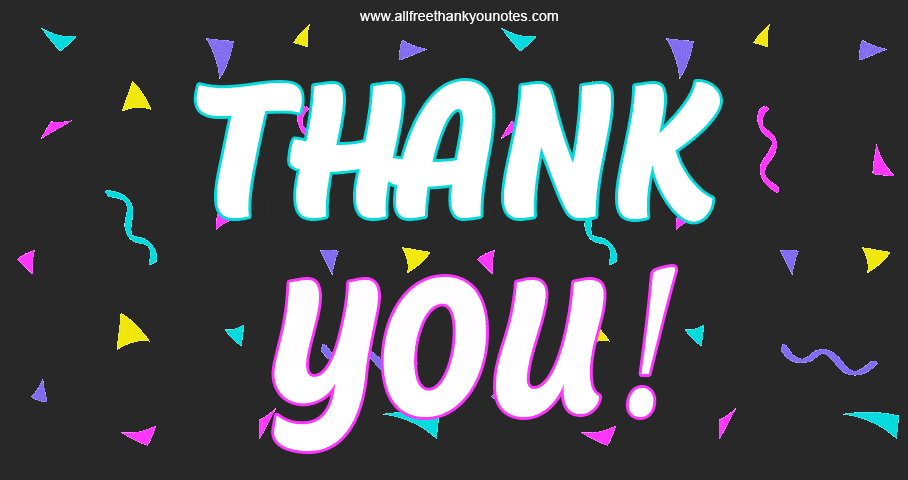